In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB 

In [2]:
df=pd.read_csv("avocado.csv")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 14
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 165.9+ KB


In [4]:
r=df.region.value_counts()
len(r)

51

In [5]:
df.type.value_counts()

conventional    1517
Name: type, dtype: int64

In [6]:
df.year.value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

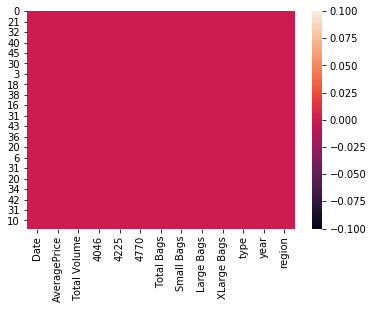

In [8]:
sns.heatmap(df.isnull())
plt.show()

# Statistics Summary

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [10]:
df=df.drop(columns=['Small Bags','Large Bags','XLarge Bags'], axis=1)

In [11]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,month
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,12
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,12
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,12
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,6
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,11


# Data visualisation

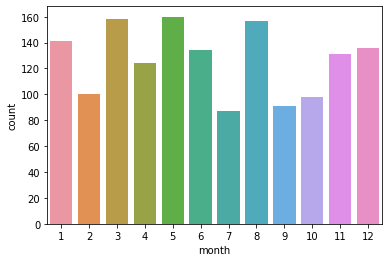

In [12]:
#univarite analysis
sns.countplot(df['month'])
plt.show()

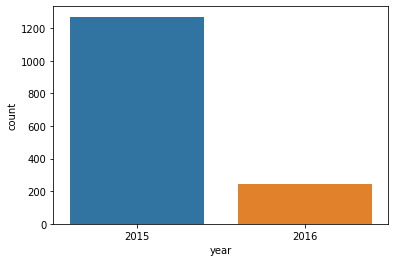

In [13]:
sns.countplot(df['year'])
plt.show()

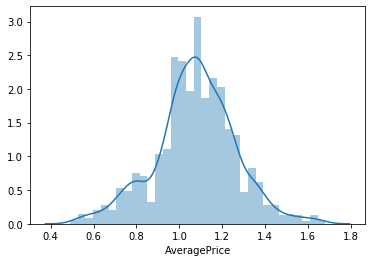

In [14]:
sns.distplot(df['AveragePrice'])
plt.show()

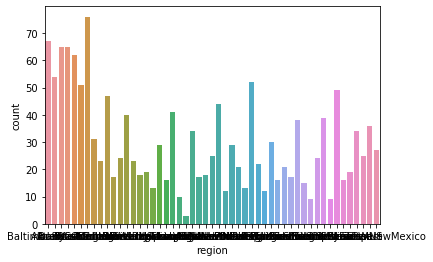

In [15]:
sns.countplot(df['region'])
plt.show()

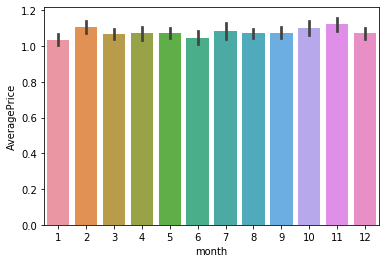

In [16]:
#bivariate analysis
sns.barplot(x='month',y='AveragePrice',data=df) 
plt.show()

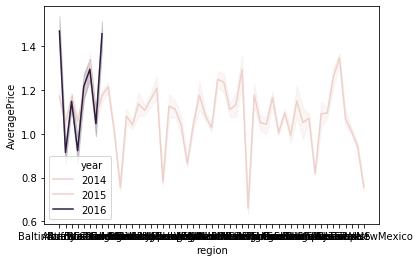

In [17]:
sns.lineplot(x='region',y='AveragePrice',hue='year',data=df) 
plt.show()

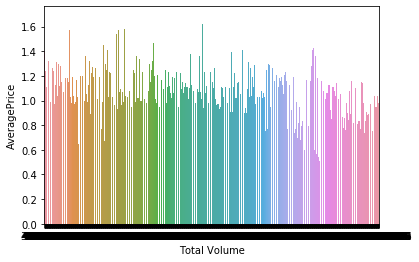

In [18]:
sns.barplot(x='Total Volume',y='AveragePrice',data=df) 
plt.show()

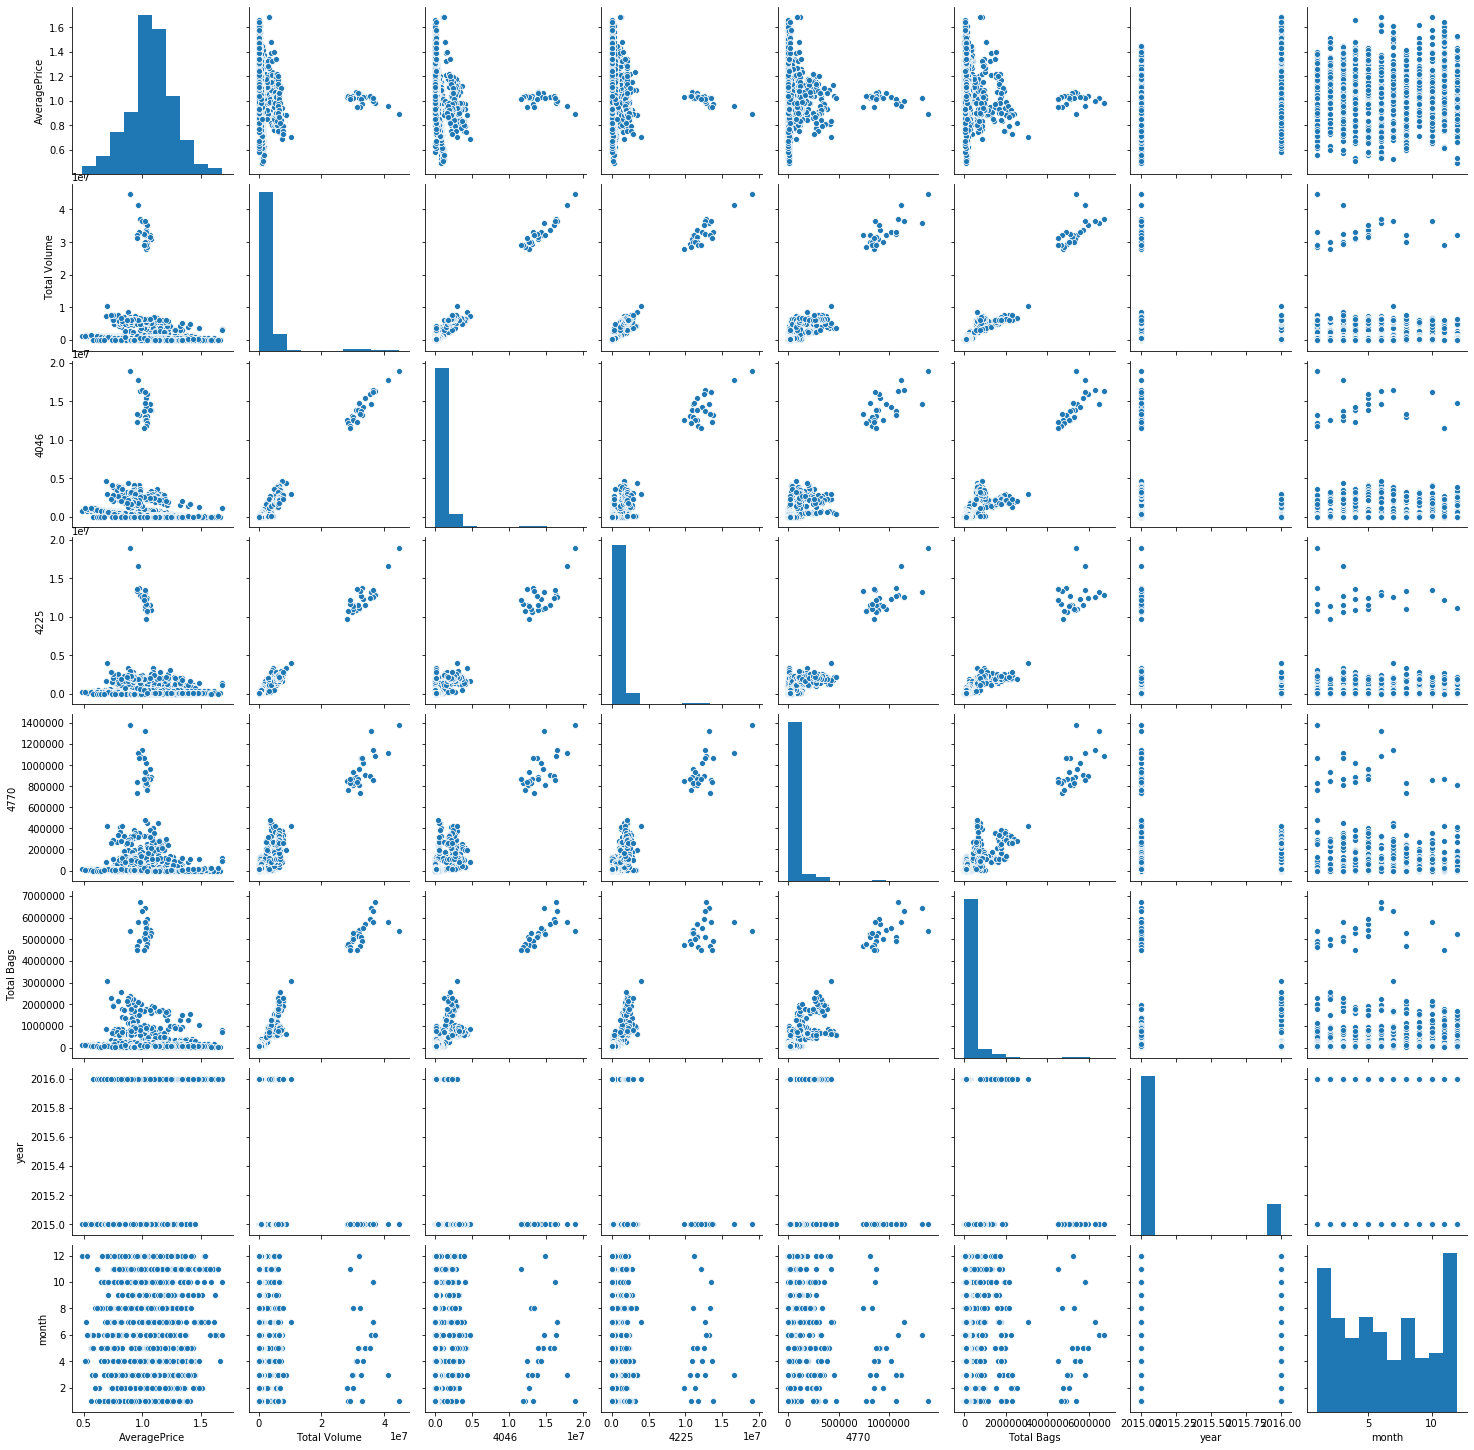

In [19]:
sns.pairplot(df)

# Data Cleaning

In [20]:
df['region'] = df['region'].astype('category').cat.codes

In [21]:
#now we can drop the date as it dont have efect on prediction
df=df.drop(columns=['Date','type'], axis=1)

In [22]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,2015,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,2015,0,11


<Figure size 720x360 with 0 Axes>

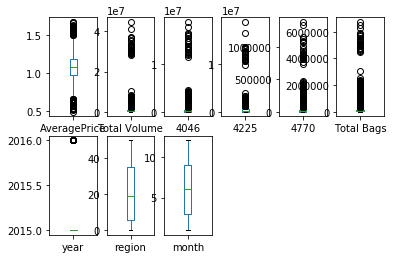

In [23]:
#outliers
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(2,6)) 
plt.show()

In [24]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(1517, 9)
(1486, 9)


In [25]:
#skewness
df.skew()

AveragePrice   -0.160356
Total Volume    2.281956
4046            2.653101
4225            2.041615
4770            3.078420
Total Bags      3.283816
year            1.821378
region          0.306769
month           0.091378
dtype: float64

In [26]:
# handling skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [27]:
df.skew()

AveragePrice   -0.160356
Total Volume    0.454270
4046           -0.272722
4225            0.005905
4770           -0.438280
Total Bags      0.487980
year            1.821378
region          0.306769
month           0.091378
dtype: float64

In [28]:
#correlation matrix
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year,region,month
AveragePrice,1.000000,-0.341755,-0.528017,-0.124861,-0.291034,-0.192635,0.168092,-0.223171,0.062158
Total Volume,-0.341755,1.000000,0.740359,0.874723,0.601903,0.926712,0.022340,0.131156,-0.053523
4046,-0.528017,0.740359,1.000000,0.393947,0.547559,0.613432,-0.117211,0.283098,-0.055478
4225,-0.124861,0.874723,0.393947,1.000000,0.507553,0.820279,0.020410,0.070563,-0.025755
4770,-0.291034,0.601903,0.547559,0.507553,1.000000,0.538877,0.018133,-0.001844,-0.006052
Total Bags,-0.192635,0.926712,0.613432,0.820279,0.538877,1.000000,0.169132,0.088696,-0.034909
year,0.168092,0.022340,-0.117211,0.020410,0.018133,0.169132,1.000000,-0.468075,-0.017400
region,-0.223171,0.131156,0.283098,0.070563,-0.001844,0.088696,-0.468075,1.000000,0.013088
month,0.062158,-0.053523,-0.055478,-0.025755,-0.006052,-0.034909,-0.017400,0.013088,1.000000


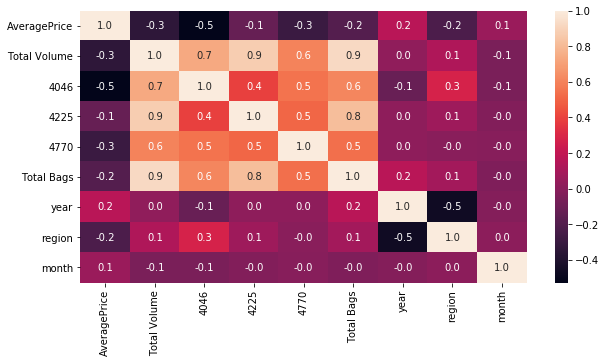

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True ,fmt='.1f')
plt.show()

In [30]:
df1=df
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year,region,month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,7.608871,0,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,7.608871,0,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,7.608871,0,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,7.608871,0,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,7.608871,0,11


# Prediction on Region using classification

In [31]:
classes_q=sorted(df.region.unique())
classes_q

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50]

In [32]:
y=df.iloc[:,-2]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int8

In [33]:
dfx=df.iloc[:,0:-2]
dfx.head()
x=dfx

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year
0,1.355265,-1.405031,-1.856364,-0.548678,-1.827643,-1.759424,-0.442148
1,1.461783,-1.523266,-2.047313,-0.671934,-1.752414,-1.689721,-0.442148
2,-0.775082,-0.947060,-1.974389,-0.117493,-1.433997,-1.810785,-0.442148
3,0.023798,-1.249784,-1.817335,-0.375692,-1.666295,-2.075487,-0.442148
4,1.088972,-1.577693,-1.899154,-0.683154,-1.649263,-2.026746,-0.442148


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [36]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(995, 7) (491, 7)
(995,) (491,)


In [37]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  91  is  0.38736228660863814


In [38]:
#GRID SEARCHCV
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svc = SVC()
grid = GridSearchCV( estimator=SVC(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
linear
{'C': 10, 'kernel': 'linear'}


In [39]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
5
distance
{'n_neighbors': 5, 'weights': 'distance'}


In [40]:
KNC=KNeighborsClassifier(n_neighbors=k,weights=w)
SV=SVC(kernel=s)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=fr_state)
MNB=MultinomialNB()

In [41]:
models = []
models.append(('KNeighborsClassifier', KNC))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
#models.append(('MultinomialNB', MNB))

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [43]:
Model = []
score = []
cvs=[]
rocscore=[]

fpr = dict()
tpr = dict()
roc_auc = dict()
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    #For ROC curves we have to binarize lables
    y_test_bin = label_binarize(y_test, classes=classes_q)
    y_pred_bin = label_binarize(pre, classes=classes_q)
    for i in range(len(classes_q)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_q))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes_q)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(classes_q)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    #for average of roc_auc
    l=len(roc_auc)
    for i in range(l):
        sroc=sum(roc_auc.values())
    froc=sroc/l
    print ('roc_auc_score = ',froc)
    rocscore.append(froc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')


Accuracy_score =  0.9226069246435845


Cross_Val_Score =  0.9300426265191367


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.94      0.94      0.94        18
           2       1.00      1.00      1.00        20
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        24
           5       0.93      1.00      0.97        14
           6       1.00      0.95      0.97        20
           7       0.92      0.85      0.88        13
           8       1.00      1.00      1.00         6
           9       0.94      1.00      0.97        17
          10       

Cross_Val_Score =  0.846549065844368


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       0.94      0.83      0.88        18
           2       0.91      1.00      0.95        20
           3       1.00      0.97      0.98        29
           4       0.92      0.92      0.92        24
           5       0.88      1.00      0.93        14
           6       0.90      0.95      0.93        20
           7       0.93      1.00      0.96        13
           8       1.00      1.00      1.00         6
           9       0.94      1.00      0.97        17
          10       1.00      0.90      0.95        10
          11       0.62      1.00      0.77         5
          12       1.00      0.91      0.95        11
          13       1.00      0.80      0.89        10
          14       0.75      0.60      0.67         5
          15       0.75      1.00      0.86       

In [44]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Rou_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Rou_auc_score
0,KNeighborsClassifier,92.260692,93.004263,NaN
1,SVC,91.242363,93.335298,NaN
2,LogisticRegression,83.095723,85.931435,NaN
3,DecisionTreeClassifier,87.983707,84.654907,NaN


In [45]:
result.mean(axis=1)

0    92.632478
1    92.288830
2    84.513579
3    86.319307
dtype: float64

# Prediction on Averageprice using regression

In [46]:
#spliting
y1=df1.iloc[:,0]
y1.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [47]:
x1=df.iloc[:,1:9]
x1.head()

,Total Volume,4046,4225,4770,Total Bags,year,region,month
0,11.070344,6.944801,10.905146,3.895080,9.070833,7.608871,0,12
1,10.912867,6.515127,10.706381,4.083115,9.159737,7.608871,0,12
2,11.680313,6.679222,11.600485,4.879007,9.005325,7.608871,0,12
3,11.277116,7.032624,11.184108,4.298373,8.667708,7.608871,0,6
4,10.840377,6.848515,10.688288,4.340944,8.729874,7.608871,0,11


In [48]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.33,random_state=42)

In [49]:
print(x1_train.shape,x1_test.shape)
print(y1_train.shape,y1_test.shape)

(995, 8) (491, 8)
(995,) (491,)


In [50]:
maxrscore=0
for r1_state in range(42,100):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x1_train,y1_train)
    y_pred= reg.predict(x1_test)
    r2s=r2_score(y1_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  99  is  0.37580634331753515


In [51]:
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr = SVR()
grid = GridSearchCV( estimator=SVR(), param_grid = parameter)
grid.fit(x1, y1)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
linear
{'C': 10, 'kernel': 'linear'}


In [52]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsRegressor()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x1, y1)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
11
uniform
{'n_neighbors': 11, 'weights': 'uniform'}


In [53]:
KNR=KNeighborsRegressor(n_neighbors=k,weights=w)
SV=SVR(kernel=s)
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=fr_state)

In [54]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', DT))

In [55]:
Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x1_train,y1_train)
    print(model)
    y1_pred=model.predict(x1_test)
    print('\n')
    sc = cross_val_score(model, x1, y1, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y1_test,y1_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_error(y1_test,y1_pred))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('\n')
   

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')


Cross_Val_Score =  -0.5864377200263506


error:
r2 score is:  0.5595892855020468


root Mean squared error:  0.1308655539218738


*********************** SVR ***********************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Cross_Val_Score =  0.05240546653753053


error:
r2 score is:  0.37153005128658956


root Mean squared error:  0.15632868248293652


*********************** LinearRegression ***********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Cross_Val_Score =  0.005107532080898813


error:
r2 score is:  0.37580634331753515


root Mean squared error:  0.15579592179

In [56]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_error':rmse})
result

,Model,Cross_val_score,r2_score,root_mean_squared_error
0,KNeighborsRegressor,-0.586438,0.559589,0.130866
1,SVR,0.052405,0.371530,0.156329
2,LinearRegression,0.005108,0.375806,0.155796
3,DecisionTreeRegressor,-0.641757,0.557487,0.131177


# Saving the best model

In [57]:
from sklearn.externals import joblib

In [58]:
joblib.dump(DT,'Avocado.pkl')

['Avocado.pkl']

In [59]:
model=joblib.load('Avocado.pkl')

In [60]:
model.predict(x1_test.head())

array([0.88, 0.99, 1.3 , 1.5 , 0.85])